## Easy to use colab notebook for connected component visualization and access
In this notebook, I will provide a tutorial for how to display and access connected components that you have either filtered yourself or filtered through my web app

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
from collections import OrderedDict
import skimage
from matplotlib import pyplot as plt
from scipy import ndimage as ndi
from skimage import color, data, filters, graph, measure, morphology,io
from skimage.filters import threshold_otsu,threshold_li
from skimage.measure import label, regionprops, regionprops_table
from skimage.color.colorconv import rgb2gray
import plotly
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.patches as mpatches

import warnings
warnings.filterwarnings('ignore')

##Here you want to upload the loopy_for_nb.py file as well as your filtered images

In [2]:
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving filtered_image.png to filtered_image.png
Saving loopy_for_nb.py to loopy_for_nb.py


## Implementation

In [3]:
from loopy_for_nb import  highlight_component, visualize_bounding_box, display_components

Here, we represent the connected components by highlighting them, if you hover over them you can see the properties of each connected component. This is helpful because it can show you exactly what you would be putting into a text recognition model.

To use this you simply type visualize_component("your_image") and run the cell!

In [4]:
highlight_component("filtered_image.png")

Here we have another way to visualize our connected components. We do this by finding what is called the 'centroid' or center of the image, and creating a rectangle which encompasses the entire shape of the component. We are also shown the coordinates of the centroid, which shows us where the components are in relation to another. To use this in a text recognition model, we would group these components together by the centroid to create 'sentences' for our model to read. This reading model will come in a future update of this github, so stay tuned!

You use this function the same way as the above function.

Coordinates of the object number 1 is [238.73 317.31   1.  ]


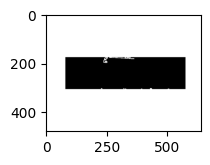

Coordinates of the object number 2 is [207.65 531.21   1.  ]


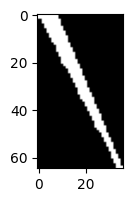

Coordinates of the object number 3 is [191.72 263.91   1.  ]


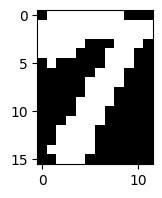

Coordinates of the object number 4 is [199.94 308.1    1.  ]


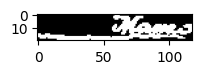

Coordinates of the object number 5 is [196.43 281.83   1.  ]


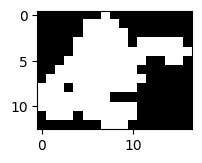

Coordinates of the object number 6 is [215.31  93.32   1.  ]


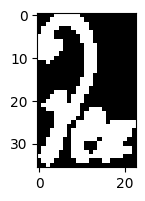

Coordinates of the object number 7 is [198.21 270.     1.  ]


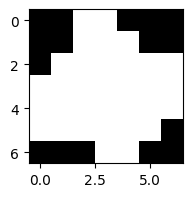

Coordinates of the object number 8 is [204.7 206.3   1. ]


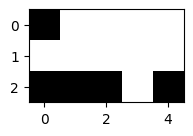

Coordinates of the object number 9 is [234.15 208.71   1.  ]


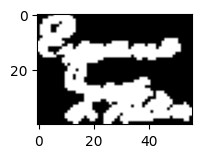

Coordinates of the object number 10 is [222.7  399.62   1.  ]


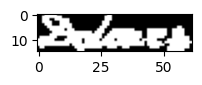

Coordinates of the object number 11 is [216.88 223.88   1.  ]


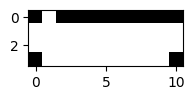

Coordinates of the object number 12 is [220.98 238.31   1.  ]


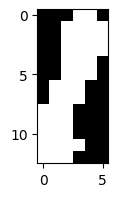

Coordinates of the object number 13 is [224.16 266.53   1.  ]


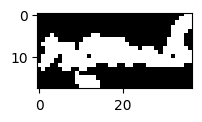

Coordinates of the object number 14 is [218.45 290.6    1.  ]


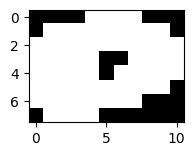

Coordinates of the object number 15 is [227.2  349.61   1.  ]


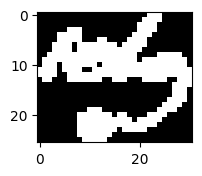

Coordinates of the object number 16 is [219.72 506.78   1.  ]


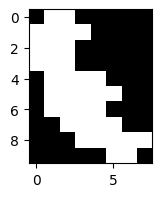

Coordinates of the object number 17 is [220.68 311.33   1.  ]


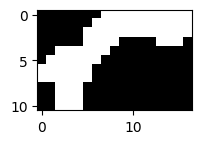

Coordinates of the object number 18 is [222.86 139.24   1.  ]


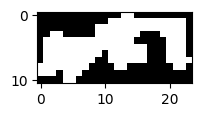

Coordinates of the object number 19 is [223.17 322.75   1.  ]


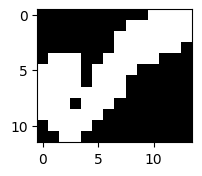

Coordinates of the object number 20 is [222.37 467.68   1.  ]


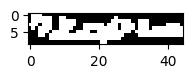

Coordinates of the object number 21 is [227.29 114.66   1.  ]


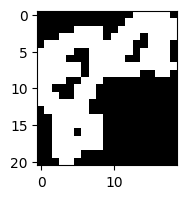

Coordinates of the object number 22 is [224.76 167.73   1.  ]


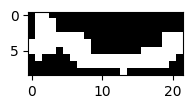

Coordinates of the object number 23 is [223.53 298.74   1.  ]


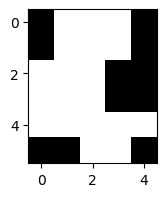

Coordinates of the object number 24 is [224.83 437.33   1.  ]


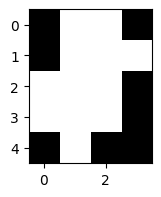

Coordinates of the object number 25 is [230.62 465.19   1.  ]


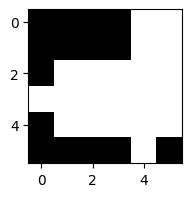

Coordinates of the object number 26 is [238.26 438.23   1.  ]


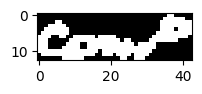

Coordinates of the object number 27 is [238.9  242.23   1.  ]


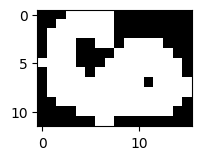

Coordinates of the object number 28 is [238.37 492.31   1.  ]


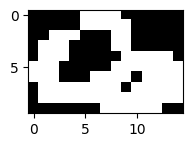

Coordinates of the object number 29 is [243.15 276.29   1.  ]


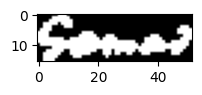

Coordinates of the object number 30 is [239.61 472.63   1.  ]


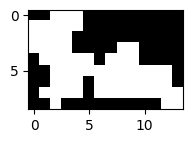

Coordinates of the object number 31 is [239.99 505.99   1.  ]


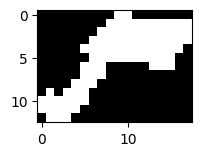

Coordinates of the object number 32 is [260.32 338.75   1.  ]


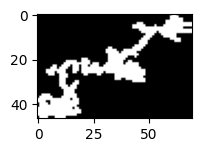

Coordinates of the object number 33 is [240.06 528.08   1.  ]


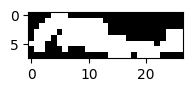

Coordinates of the object number 34 is [241.99 327.54   1.  ]


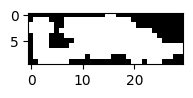

Coordinates of the object number 35 is [241.16 396.38   1.  ]


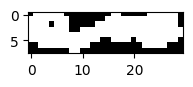

Coordinates of the object number 36 is [255.59 527.3    1.  ]


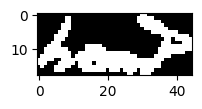

Coordinates of the object number 37 is [258.25 379.72   1.  ]


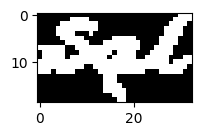

Coordinates of the object number 38 is [257.08 425.87   1.  ]


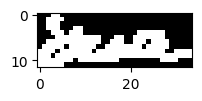

Coordinates of the object number 39 is [255.73 491.02   1.  ]


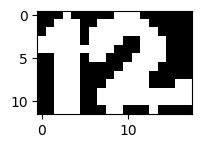

Coordinates of the object number 40 is [255.95 263.79   1.  ]


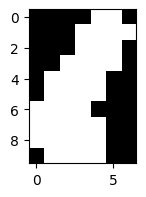

Coordinates of the object number 41 is [259.92 289.95   1.  ]


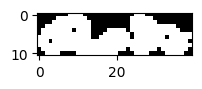

Coordinates of the object number 42 is [258.35 403.95   1.  ]


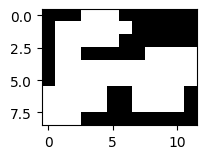

Coordinates of the object number 43 is [257.81 464.97   1.  ]


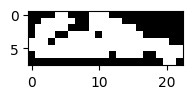

Coordinates of the object number 44 is [261.3 204.2   1. ]


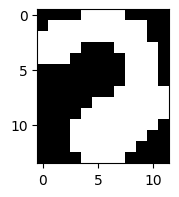

Coordinates of the object number 45 is [262.21 238.64   1.  ]


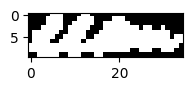

Coordinates of the object number 46 is [263. 219.   1.]


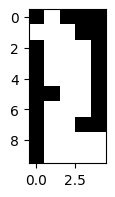

Coordinates of the object number 47 is [260.   451.23   1.  ]


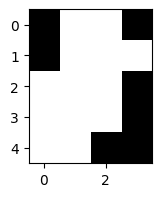

Coordinates of the object number 48 is [265.39 100.55   1.  ]


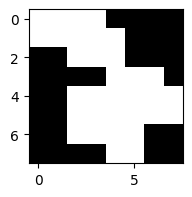

Coordinates of the object number 49 is [274.95 379.49   1.  ]


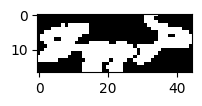

Coordinates of the object number 50 is [274.05 333.7    1.  ]


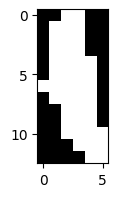

Coordinates of the object number 51 is [279.18 251.57   1.  ]


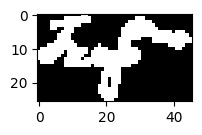

Coordinates of the object number 52 is [275.17 352.71   1.  ]


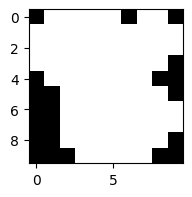

Coordinates of the object number 53 is [290.12 292.87   1.  ]


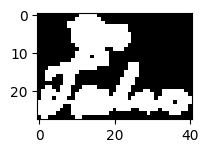

Coordinates of the object number 54 is [276.91 342.37   1.  ]


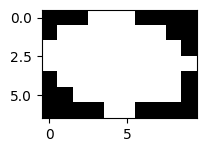

Coordinates of the object number 55 is [280.55 217.35   1.  ]


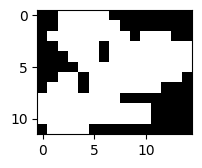

Coordinates of the object number 56 is [280.   399.67   1.  ]


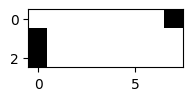

Coordinates of the object number 57 is [287.53 558.86   1.  ]


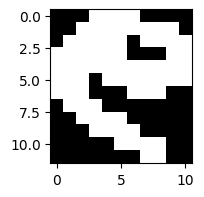

Coordinates of the object number 58 is [292.81 507.36   1.  ]


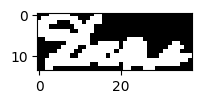

Coordinates of the object number 59 is [293.91 333.91   1.  ]


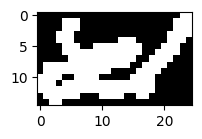

Coordinates of the object number 60 is [293.32 461.67   1.  ]


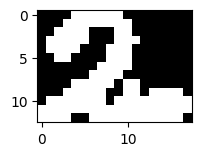

Coordinates of the object number 61 is [288.5 391.    1. ]


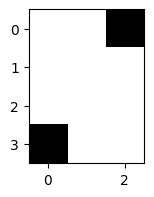

Coordinates of the object number 62 is [288.26 402.26   1.  ]


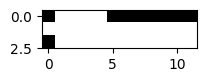

Coordinates of the object number 63 is [295.11 387.97   1.  ]


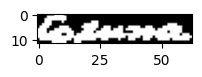

Coordinates of the object number 64 is [290.62 119.62   1.  ]


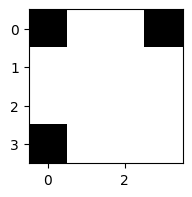

Coordinates of the object number 65 is [290.73 128.67   1.  ]


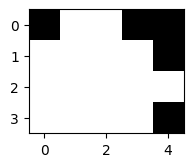

Coordinates of the object number 66 is [294.39 484.24   1.  ]


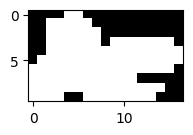

Coordinates of the object number 67 is [292.  161.6   1. ]


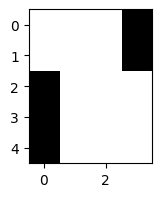

Coordinates of the object number 68 is [295.08 439.35   1.  ]


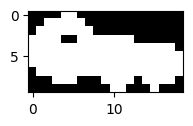

Coordinates of the object number 69 is [294.83 540.78   1.  ]


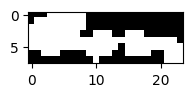

Coordinates of the object number 70 is [296.19 349.09   1.  ]


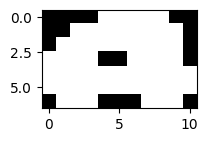

Coordinates of the object number 71 is [301.95 566.02   1.  ]


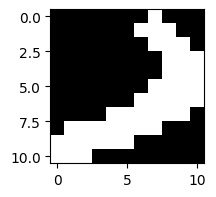

Coordinates of the object number 72 is [303.27 381.77   1.  ]


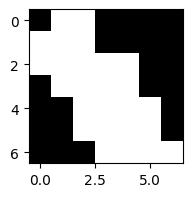

In [5]:
display_components("filtered_image.png")

Below, we use a function to show where the connected components are in relation to the rest of the text. The red boxes are where the boundaries of each of the connected components are, and is just another way of visualizing these components.

You use this function in the same manner as the other two.

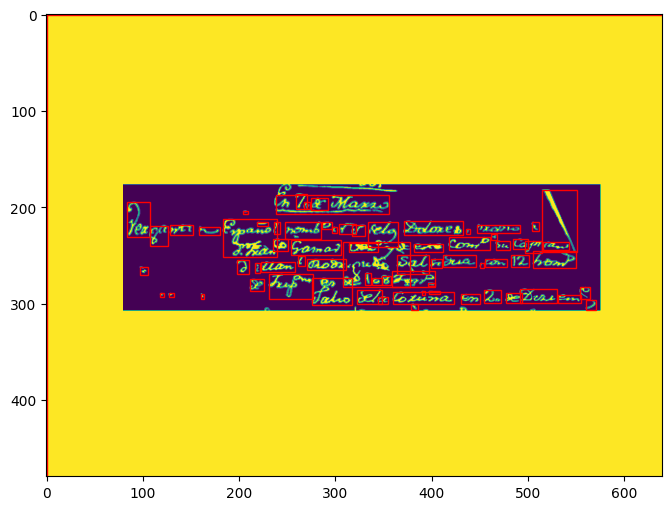

In [6]:
visualize_bounding_box("filtered_image.png")

Thank you for following me along on my project!